<a href="https://colab.research.google.com/github/patty1997/Deep_Learning_Projects/blob/main/transfer_learning_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns

from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD

In [ ]:
SIZE = 224

train_images = []
train_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Data/train_set/*"):
  label = directory_path.split("/")[-1]
  print(label)
  for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (SIZE,SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    train_images.append(img)
    train_labels.append(label)

train_images = np.array(train_images)
train_labels = np.array(train_labels)

diseased
healthy


In [ ]:
test_images = []
test_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Colab Notebooks/Data/test_set/*"):
  fruit_label = directory_path.split("/")[-1]
  print(fruit_label)
  for img_path in glob.glob(os.path.join(directory_path, "*.JPG")):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (SIZE,SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    test_images.append(img)
    test_labels.append(fruit_label)

test_images = np.array(test_images)
test_labels = np.array(test_labels) 

healthy
diseased


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
test_labels_encoded = le.fit_transform(test_labels)
train_labels_encoded = le.fit_transform(train_labels)

print(np.unique(test_labels_encoded))
print(np.unique(train_labels_encoded))

[0 1]
[0 1]


In [ ]:
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded
x_train, x_test = (x_train.astype('float32')) / 255., (x_test.astype('float32')) / 255. #Normalization

In [ ]:
!pip install keras
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_test)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
VGG_model = VGG16(weights='imagenet', include_top = False, input_shape=(SIZE,SIZE,3))
VGG_model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [ ]:
# train_datagen = ImageDataGenerator(rotation_range=45,width_shift_range=0.2,zoom_range=0.2,horizontal_flip=True)
# train_datagen.fit(traindata)
 # train_generator = train_datagen.flow(traindata, batch_size=32)

In [ ]:
model = Sequential([
    VGG_model,
    Flatten(),
    Dense(units=256, activation="relu"),
    Dense(units=256, activation="relu"),
    Dense(units=2, activation="softmax")
])
opt1= SGD(learning_rate=0.001,momentum=0.9)
model.compile(optimizer=opt1, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 21,203,778
Trainable params: 21,203,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test,y_test),verbose=1)

Epoch 1/25
54/54 [==============================] - 49s 322ms/step - loss: 0.5524 - accuracy: 0.7042 - val_loss: 0.1503 - val_accuracy: 0.9386
Epoch 2/25
54/54 [==============================] - 12s 228ms/step - loss: 0.1844 - accuracy: 0.9327 - val_loss: 0.1732 - val_accuracy: 0.9318
Epoch 3/25
54/54 [==============================] - 12s 228ms/step - loss: 0.0521 - accuracy: 0.9798 - val_loss: 0.0232 - val_accuracy: 0.9959
Epoch 4/25
54/54 [==============================] - 12s 228ms/step - loss: 0.0442 - accuracy: 0.9819 - val_loss: 0.0154 - val_accuracy: 0.9959
Epoch 5/25
54/54 [==============================] - 12s 228ms/step - loss: 0.0065 - accuracy: 0.9985 - val_loss: 0.0116 - val_accuracy: 0.9973
Epoch 6/25
54/54 [==============================] - 12s 228ms/step - loss: 2.5896e-04 - accuracy: 1.0000 - val_loss: 0.0116 - val_accuracy: 0.9973
Epoch 7/25
54/54 [==============================] - 12s 228ms/step - loss: 1.5015e-04 - accuracy: 1.0000 - val_loss: 0.0115 - val_accuracy

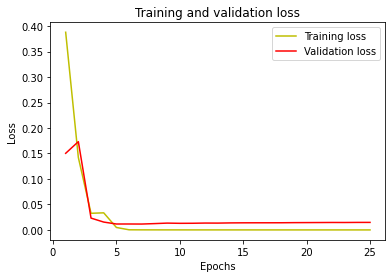

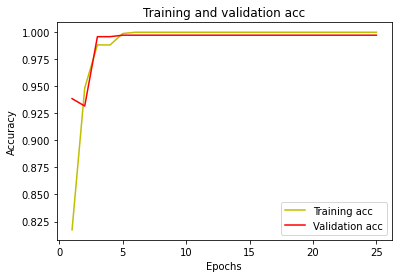

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y',label='Training acc')
plt.plot(epochs,val_loss,'r',label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
_, acc = model.evaluate(x_test, y_test)
print("Accuracy = ",(acc * 100.0),"%")

23/23 [==============================] - 1s 63ms/step - loss: 0.0148 - accuracy: 0.9973
Accuracy =  99.7271478176117 %


The prediction for this image is:  diseased
The actual label for this image is:  diseased


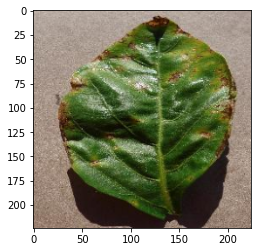

In [ ]:
n = np.random.randint(0, x_test.shape[0])
img = x_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0)
output = model.predict(input_img)
if output[0][0] > output[0][1]:
  VGG_prediction = 'diseased'
else:
  VGG_prediction = 'healthy'  
print("The prediction for this image is: ", VGG_prediction)
print("The actual label for this image is: ", test_labels[n])

In [ ]:
# model.save('/content/drive/MyDrive/Colab Notebooks/vgg_16_PepperBell.h5')

In [ ]:
from sklearn.metrics import confusion_matrix
print(y_test.shape)
y_pred  = model.predict(x_test)
y_pred_class = np.argmax(y_pred,axis = 1)
y_test_class = np.argmax(y_test,axis = 1)
print(y_test_class)
cm = confusion_matrix(y_test_class,y_pred_class)
print(cm)

(733, 2)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_test_class, y_pred_class, average = 'micro')

0.9972714870395635

VGG16: ROC AUC=0.998


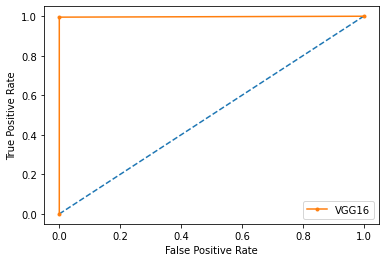

In [ ]:
ns_probs = [0 for _ in range(len(y_test_class))]
# fit a model
# predict probabilities
# keep probabilities for the positive outcome only
from sklearn.metrics import roc_auc_score, roc_curve
# calculate scores
ns_auc = roc_auc_score(y_test_class, ns_probs)
lr_auc = roc_auc_score(y_test_class, y_pred_class)
# summarize scores
# print('Center: ROC AUC=%.3f' % (ns_auc))
print('VGG16: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_class, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_class, y_pred_class)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--')
plt.plot(lr_fpr, lr_tpr, marker='.', label='VGG16')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

       count      mean       std     min      25%     50%      75%    max
Value   12.0  0.750458  0.423133  0.0116  0.74575  0.9808  0.99495  0.998
       count      mean       std     min      25%     50%      75%    max
Value   12.0  0.750458  0.423133  0.0116  0.74575  0.9808  0.99495  0.998
         Model   Value
0  InceptionV3  3.0032
1     ResNet50  2.9978
2        VGG16  3.0045


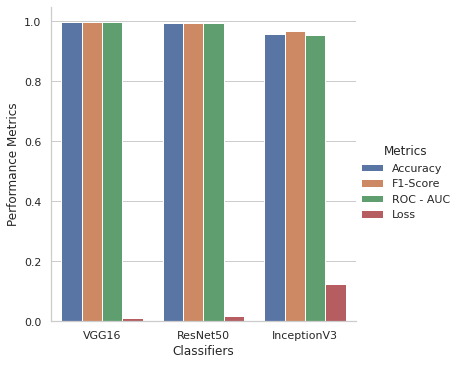

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/modelperformance.csv')

print(df1.describe().T)

print(df1.describe().T)
sns.set_theme(style="whitegrid")
cl_plot = sns.catplot(data=df1 ,y="Value",kind = "bar", x = "Model",hue="Metrics" )
cl_plot.set_ylabels("Performance Metrics")
cl_plot.set_xlabels("Classifiers") 

groupedvalues=df1.groupby('Model').sum().reset_index()
print(groupedvalues)